## Exercise 2.2: Graph Analysis with Matplotlib

#### 1. Using a data set of your choice, write an introduction explaining the data set.

For this assignment, my data set of choice is a powerlifting data set. This data set includes data that encompasses a snapshot of the OpenPowerlifting database as of February 2018. OpenPowerlifting is an organization that tracks meets and competitor results in the sport of powerlifting. Powerlifting as a sport is defined by three lifts: the backsquat, the bench press, and the deadlift. More specifically, in this sport, competitors receive three "attempts" for each lift (9 lift attempts total) and then receive a final aggregate score of their highest lift for each of the three lifts. Competition placement is then awarded based upon the most weight lifted per weight class and age category. 

The variables included in this data set are:

* MeetId
* Name
* Sex
* Equipment
* Age
* Division
* BodyweightKg
* WeightClassKg
* Squat4Kg
* BestSquatKg
* Bench4Kg
* BestBenchKg
* Deadlift4Kg
* BestDeadliftKg
* TotalKg
* Place
* Wilks

I will be working with the following variables in my analysis for this assignment:

* Sex
* Age
* TotalKg

As a side note, my interest in using this data set and asking the below questions stems primarily from the fact that I have been training and competing in powerlifting as a sport for the past 10 years. So I am passionate about it and interested to run some numbers and create some visualizations! 

#### 2. Identify a question or question(s) that you would like to explore in your data set.

Some questions that I would like to explore within this data set include:

* What is the relationship between overall bodyweight and lifting ability/capacity (in kilograms)?
    * I would like to look at both absolute strength and relative strength.
* What is the age distribution of all of the lifters?
    * I would like to look at age overall as well as age by gender.
* Based on the above:
    * What insights can we find about strength?
    * What gender differences exist within the sport?

#### 3. Create at least three graphs that help answer these questions. Make sure your graphs are clearly readable and are labeled appropriately and professionally.

In [88]:
## Load the data.

import pandas as pd
import os

powerlifting_df = pd.read_csv(r"C:\Users\Madeleine's PC\Documents\Madeleine\Documents\Bellevue University Courses\Masters in DS\BU DSC550\Data\Open_Powerlifting.csv")

## View the data.

powerlifting_df.head(10)

,MeetID,Name,Sex,Equipment,Age,Division,BodyweightKg,WeightClassKg,Squat4Kg,BestSquatKg,Bench4Kg,BestBenchKg,Deadlift4Kg,BestDeadliftKg,TotalKg,Place,Wilks
0,0,Angie Belk Terry,F,Wraps,47.0,Mst 45-49,59.60,60,NaN,47.63,NaN,20.41,NaN,70.31,138.35,1,155.05
1,0,Dawn Bogart,F,Single-ply,42.0,Mst 40-44,58.51,60,NaN,142.88,NaN,95.25,NaN,163.29,401.42,1,456.38
2,0,Dawn Bogart,F,Single-ply,42.0,Open Senior,58.51,60,NaN,142.88,NaN,95.25,NaN,163.29,401.42,1,456.38
3,0,Dawn Bogart,F,Raw,42.0,Open Senior,58.51,60,NaN,NaN,NaN,95.25,NaN,NaN,95.25,1,108.29
4,0,Destiny Dula,F,Raw,18.0,Teen 18-19,63.68,67.5,NaN,NaN,NaN,31.75,NaN,90.72,122.47,1,130.47
5,0,Courtney Norris,F,Wraps,28.0,Open Senior,62.41,67.5,-183.7,170.10,NaN,77.11,NaN,145.15,392.36,1,424.40
6,0,Maureen Clary,F,Raw,60.0,Mst 60-64,67.31,67.5,NaN,124.74,NaN,95.25,NaN,163.29,383.28,1,391.98
7,0,Maureen Clary,F,Raw,60.0,Open Senior,67.31,67.5,NaN,124.74,NaN,95.25,NaN,163.29,383.28,1,391.98
8,0,Priscilla Sweat Pardue,F,Wraps,52.0,50-54,65.95,67.5,NaN,120.20,NaN,54.43,NaN,108.86,283.49,1,294.25
9,0,Priscilla Sweat Pardue,F,Raw,52.0,Senior,65.95,67.5,NaN,NaN,NaN,NaN,NaN,108.86,108.86,1,112.99


In [89]:
## Find the dimensions (number of rows and columns) in the data frame.

powerlifting_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 386414 entries, 0 to 386413
Data columns (total 17 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   MeetID          386414 non-null  int64  
 1   Name            386414 non-null  object 
 2   Sex             386414 non-null  object 
 3   Equipment       386414 non-null  object 
 4   Age             147147 non-null  float64
 5   Division        370571 non-null  object 
 6   BodyweightKg    384012 non-null  float64
 7   WeightClassKg   382602 non-null  object 
 8   Squat4Kg        1243 non-null    float64
 9   BestSquatKg     298071 non-null  float64
 10  Bench4Kg        1962 non-null    float64
 11  BestBenchKg     356364 non-null  float64
 12  Deadlift4Kg     2800 non-null    float64
 13  BestDeadliftKg  317847 non-null  float64
 14  TotalKg         363237 non-null  float64
 15  Place           385322 non-null  object 
 16  Wilks           362194 non-null  float64
dtypes: float64

In [90]:
## Address any missing values in the data set for the variables I will be using. 
## I do not want to remove NaN values - this is because if a lifter fails a lift, it is counted as a "no lift."
## So NaN here is a legitimate value (NOT the same as 0).

import numpy as np
powerlifting_df.isnull().head()
powerlifting_df['BodyweightKg'] = powerlifting_df['BodyweightKg'].apply(pd.to_numeric, errors = 'coerce')
powerlifting_df['TotalKg'] = powerlifting_df['TotalKg'].apply(pd.to_numeric, errors = 'coerce')
powerlifting_df['Age'] = powerlifting_df['Age'].apply(pd.to_numeric, errors = 'coerce')

##### Graph 1: Histogram of the distribution of absolute strength. 
    
* Absolute strength is simply the amount of weight lifted, regardless of the bodyweight of the lifter.
* This graph shows absolute strength by gender.

Text(1.4897916666666617, 0.5, 'Frequency of Total Amounts Lifted')

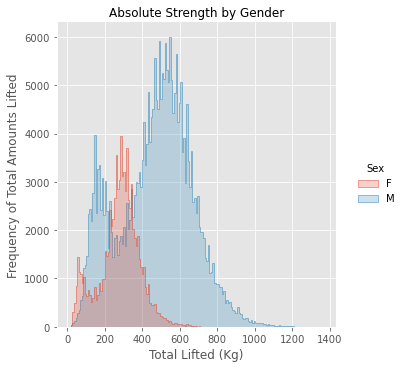

In [91]:
## Graph 1: What is the relationship between overall bodyweight and lifting ability/capacity (in kilograms)?
## I would like to look at both absolute strength and relative strength.

import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn
import seaborn as sns

## Plot for absolute strength.
## Absolute strength is simply the amount of weight lifted, regardless of the bodyweight of the lifter.
## Histogram by gender.

sns.displot(powerlifting_df, x="TotalKg", hue="Sex", element="step")
plt.title('Absolute Strength by Gender',fontsize=12)
plt.xlabel('Total Lifted (Kg)')
plt.ylabel('Frequency of Total Amounts Lifted')

In this first graph, we can ascertain that overall a few things are taking place:

* The distributions for both genders shows a bimodal distribution (otherwise known as a two peak distribution). The two peaks in this type of distribution indicate two local maximums in the data (points where the data points stop increasing and start decreasing).
* We can see that the majority of weight lifted overall falls within the 200-300 Kg range for women, and the 400-700 Kg range for men. 
* Overall, it appears as though more men participated in meets. While men do have more absolute strength from a biological standpoint, since more men were competing, this will also contribute to total amounts lifted overall across all male lifters.


##### Graph 2: Scatterplot of relative strength for both genders.
    
* Relative strength is weight lifted divided by the bodyweight of the lifter. Using the multiplier will show who is strongest by bodyweight. This gives us our ratio value.
* This graph shows relative strength by gender.

In [92]:
## Calculate for relative strength.
## Relative strength is weight lifted divided by the bodyweight of the lifter. Using the multiplier will show who is strongest by bodyweight.

def totalLiftBody(x):
    return x['TotalKg'] / x['BodyweightKg']

powerlifting_df['RelativeStrengthRatio'] = powerlifting_df.apply(totalLiftBody, axis=1)

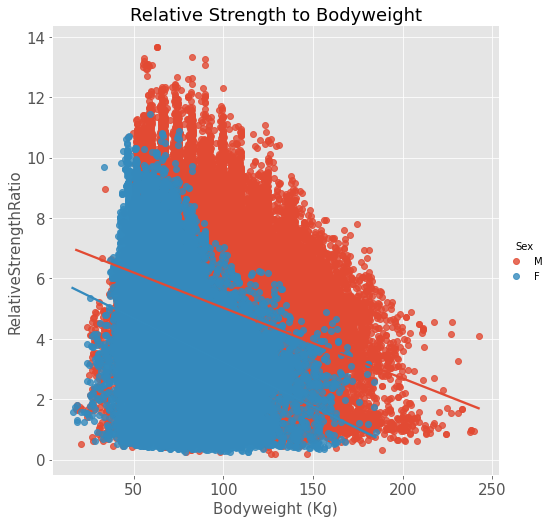

In [93]:
## Plot a scatterplot to view relative strength (relationship between bodyweight and total weight lifted).
hue_order = ['M', 'F']
sns.lmplot(data=powerlifting_df,
           x='BodyweightKg',
           y='RelativeStrengthRatio',
           hue='Sex', hue_order=hue_order,
           height=7)
plt.title('Relative Strength to Bodyweight',fontsize=18)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel('RelativeStrengthRatio',fontsize=15)
plt.xlabel('Bodyweight (Kg)',fontsize=15)
plt.show()

In this second graph, we can deduce the following:

* Like we saw before, we can see that more male lifters exist in this data set overall (more male lifters at meets).
* An interesting finding is that a higher bodyweight does not necessarily mean greater relative strength! In fact, we can see in the scatterplot overall and from the trend line that those with lower body weights tend to have higher relative strength.
* This is looking at the entire data set overall, with no dropped missing values. I wanted to keep NaN and first look at it this way, as some variables have missing values that do not necessarily impact this measurement, especially if I am not using those variable (e.g., Name). However, in the next step, I will drop all missing values from the data set just to explore.

##### Graph 3: Scatterplot of relative strength for both genders, missing values dropped.
    
* Relative strength is weight lifted divided by the bodyweight of the lifter. Using the multiplier will show who is strongest by bodyweight. This gives us our ratio value.
* This graph shows relative strength by gender.
* This graph is the same as above, except now with missing values removed. I wanted to explore how this might change things.

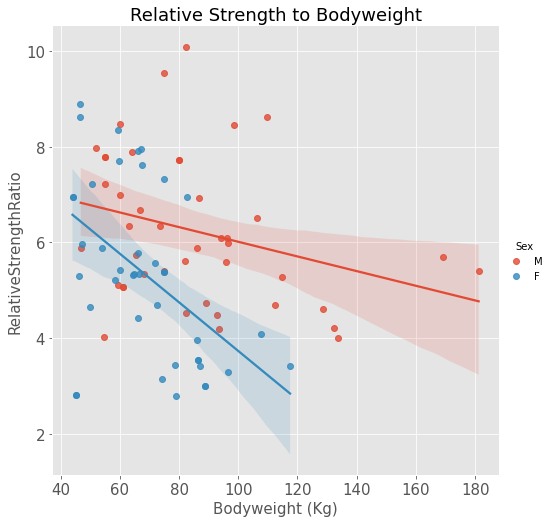

In [94]:
## Plot a scatterplot of the relative body strength, but dropping any missing values.

hue_order = ['M', 'F']
sns.lmplot(data=powerlifting_df.dropna(),
           x='BodyweightKg',
           y='RelativeStrengthRatio',
           hue='Sex', hue_order=hue_order,
           height=7)
plt.title('Relative Strength to Bodyweight',fontsize=18)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel('RelativeStrengthRatio',fontsize=15)
plt.xlabel('Bodyweight (Kg)',fontsize=15)
plt.show()

Overall, from the above scatterplot, we can ascertain the following:

* The trend line is still pretty similar to the one in the scatterplot in Graph 2.
* Of course, when we remove all rows that have any missing values from the data set, we end up with significantly fewer  data points to be plotted.
* We can still see that those with a lower bodyweight had greater relative strength than those with a higher bodyweight.

##### Graph 4: Histogram of distribution of ages of all lifters.

* Assessing the age distribution of all lifters.

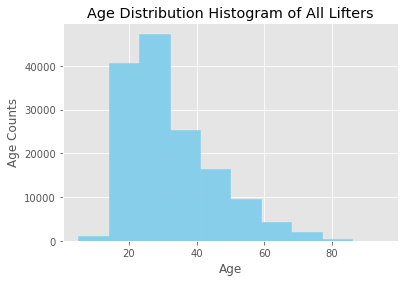

In [97]:
## Assessing the age distribution of all lifters.

plt.style.use('ggplot')
ages = powerlifting_df.Age
plt.hist(ages, color = "skyblue", ec="skyblue")
plt.xlabel("Age")
plt.ylabel("Age Counts")
plt.title("Age Distribution Histogram of All Lifters")
plt.show()

From the histogram above, we can see:

* The age distribution is largely right-skewed, even though a small portion of lifters were in the what looks to be 5-15 age range. 
* The majority of lifters fall on the younger side - the right-skewness indicates that lifters' ages taper off after about the 45/50 age mark.
* The age range with the most lifters is within the early twenties to age thirty or so.

##### Graph 5: Histogram of distribution of ages by gender.

* Assessing the age distribution with the addition of looking at it by gender.

Text(1.4897916666666617, 0.5, 'Age Counts')

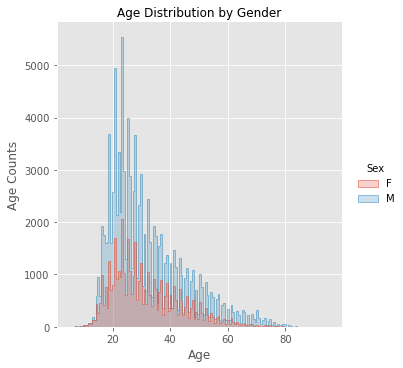

In [96]:
## Assessing age distribution of all lifters by gender.

sns.displot(powerlifting_df, x="Age", hue="Sex", element="step")
plt.title('Age Distribution by Gender',fontsize=12)
plt.xlabel('Age')
plt.ylabel('Age Counts')

From the age and gender histogram above, we can see:

* The age distribution still presents as right-skewed (this histogram gives a better overall view and is probably more helpful than just the age one above).
* Again, the majority of lifters fall on the younger side.
* Interesting to see is that the distributions of both men and women essentially follow the same distribution curve - both have the largest concentration of lifters in the 20s-30s range with a significant taper after the age of 50/60.
* As our other graphs have indicated, far more men have competed in the meets within this data set than women.

#### 4. Explain what you have learned from each of your graphs.

Each respective graph has been discussed/explained above in specific detail, however, overall these graphs appear to portray some of the same findings/patterns:

* More men have been involved in powerlifting meets (at least the ones housed within the OpenPowerlifting data set I am using).
* Those individuals with a lighter bodyweight tend to have more relative strength than those with a heavier bodyweight (this is true for both males and females).
* Those participating in meets are largely under the age of 40. This is is also true for both males and females. 

#### 5. Write a conclusion that summarizes your findings.

In conclusion, this specific analysis indicates that the sport of powerlifting is largely still dominated by men. This could be for various reasons - societally it could be "seen" as more of a "man's sport", women may fear becoming "too bulky" (which is quite the fallacy!), etc. In any case, it is clear to see that many more men have competed in these meets than women. 

Additionally, we can see that this sport is also largely dominated by people on the younger side of the age spectrum (for both males/females). This could also stem from societal expectations about who can and cannot lift/who should/should not (younger people vs. older people). (Also, important to note, lifting is actually excellent for bones even into older age - expecially to ward off osteoporosis. Poor technique, not lifting weights itself, is usually what causes issues and injury for people). 

Lastly, and probably the most interesting (to me, at least) is the relative strength analysis - sheer bodyweight is not always indicative of greater relative strength. These analyses make it clear to see that those on the lighter side of the scale fare better when it comes to relative strength than those on the heavier side.

Some questions that I have for future analysis would be:

* What is the overall competition placing for those with a lighter bodyweight versus those with a heavier bodyweight? In weight classes, do those on the front end (lighter side) of a weight class tend to do better (in terms of placement) than those at the tail end (heavier side) of their respective weight class?
* What were the TotalKg differences between the equipment groups (e.g., raw lifting vs. equipped lifting) for lifters, and are those differences significant?

Overall, I enjoyed this analysis - primarily because it is a topic I am passionate about, but also because I learned something new! One of the reasons I love data science so much is that no matter what data set is analyzed, something new can be learned, a new pattern can be found, etc. It is a great field to continually learn and grow.